## Prepare data

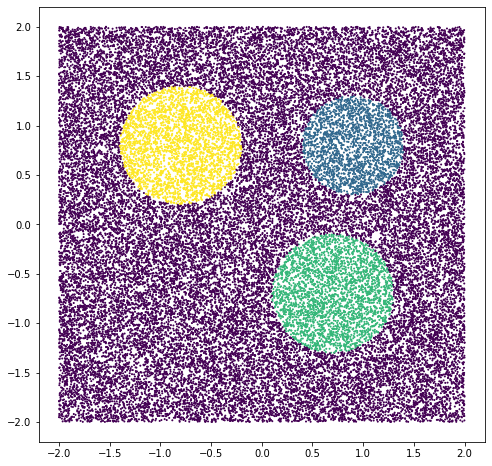

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
%matplotlib inline
#Prepare data
N=40000
L=4
X = L*np.random.rand(N,2) 
X[:,0] = X[:,0]-L/2
X[:,1] = X[:,1]-L/2

Y = np.zeros(N)

for i in range(N):
    if (X[i,0]-0.9)**2+(X[i,1]-0.8)**2<0.25:
        Y[i]=1
    elif (X[i,0]-0.7)**2+(X[i,1]+0.7)**2<0.36:
        Y[i]=2
    elif (X[i,0]+0.8)**2+(X[i,1]-0.8)**2<0.36:
        Y[i]=3
    else:
        Y[i]=0
        
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:, 1], s=1, c=Y)
plt.show()

data = X
labels = to_categorical(Y)

In [2]:
import activation_plot as aplt

hid_layer_units = [10,10]
model = aplt.prepare_model(hid_layer_units,n_category=len(labels[0]))
model_name = ''.join(str(e) for e in hid_layer_units)+'2'
model.save(model_name+'_model.h5')
#model.fit(data, labels, epochs=10,batch_size=32)

In [3]:
from tensorflow.keras import backend as K

layer_output_functions = aplt.get_layer_output_functions(model)

X_test = aplt.data_grid(200,2)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
colors = aplt.get_color(X_test)

activations = aplt.get_data_activation(X_test,layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

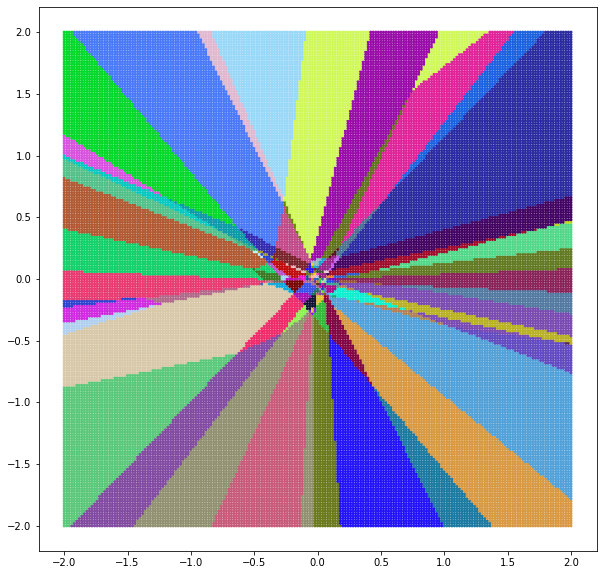

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.show()
plt.close()

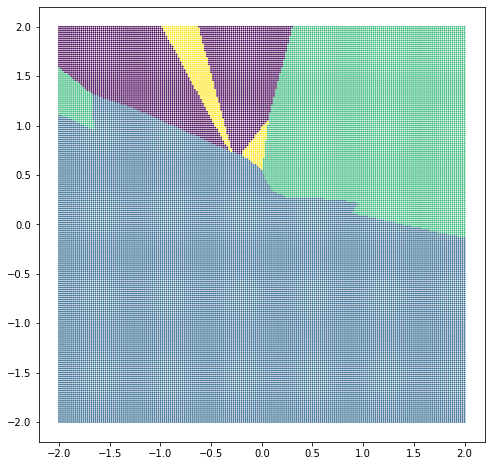

In [5]:
#test
import numpy as np

X_test = aplt.data_grid(200,2)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=0.5,alpha=1)
plt.show()
plt.close()

In [6]:
from tensorflow.keras.models import load_model

model_copy = load_model(model_name+'_model.h5')

In [7]:
A,b = model_copy.layers[0].get_weights()
#model_copy.layers[0].set_weights([A,2*b])

In [9]:
A

array([[ 0.09315652,  0.02470142, -0.25260663, -0.6132139 ,  0.13023478,
        -0.0955317 ,  0.10302442,  0.4935047 , -0.6410837 ,  0.06133729],
       [ 0.23529875,  0.56605524,  0.2361589 , -0.2970825 , -0.63778937,
        -0.4402375 ,  0.0853799 , -0.36982173,  0.28760892, -0.51016784]],
      dtype=float32)

In [108]:
#model_copy.fit(data, labels, epochs=10,batch_size=32)

In [109]:
from tensorflow.keras import backend as K

get_layer_output_functions = []
for layer_i in range(len(model.layers)):
    get_layer_output_functions.append(K.function(model.layers[0].input,model.layers[layer_i].output))

X_test = aplt.data_grid(200,10)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
colors = aplt.get_color(X_test)

activations = aplt.get_data_activation(X_test,get_layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

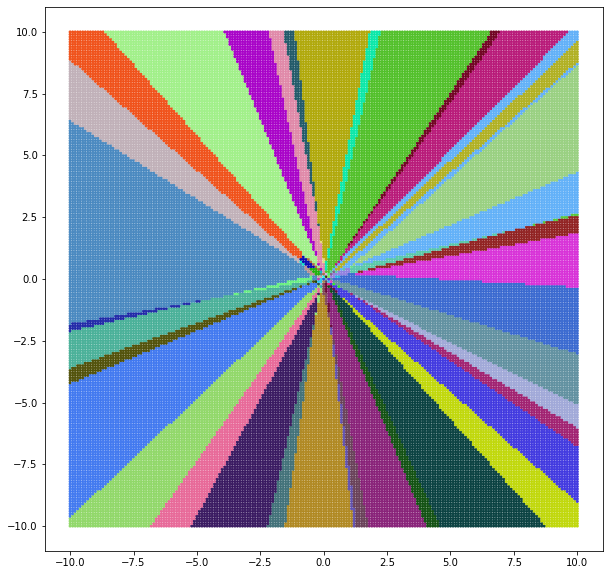

In [110]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.show()
plt.close()

In [ ]:
#test
import numpy as np

X_test = aplt.data_grid(200,2)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=0.5,alpha=1)
plt.show()
plt.close()